# Analysis

In [1]:
# Load the data
import pandas as pd
pumpkins = pd.read_csv('./US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
# Check if there are any missing values
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [3]:
# Select only the columns we need
select_columns = [ 'Date', 'Variety', 'City Name', 'Package', 'Low Price', 'High Price']
pumpkins = pumpkins[select_columns]
pumpkins.head()

,Date,Variety,City Name,Package,Low Price,High Price
0,4/29/17,NaN,BALTIMORE,24 inch bins,270.0,280.0
1,5/6/17,NaN,BALTIMORE,24 inch bins,270.0,280.0
2,9/24/16,HOWDEN TYPE,BALTIMORE,24 inch bins,160.0,160.0
3,9/24/16,HOWDEN TYPE,BALTIMORE,24 inch bins,160.0,160.0
4,11/5/16,HOWDEN TYPE,BALTIMORE,24 inch bins,90.0,100.0


In [4]:
# Add a day_of_year column to the dataframe based on the Date column
from datetime import datetime
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

In [5]:
# Determine the average price of a pumpkin
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

In [6]:
# Copy the data into a new dataframe including all of the select_columns and the new columns
new_pumpkins = pd.DataFrame({'Month': month, 'Day': day_of_year, 'Package': pumpkins['Package'], 'Variety': pumpkins['Variety'], 'City Name': pumpkins['City Name'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()

,Month,Day,Package,Variety,City Name,Low Price,High Price,Price
0,4,118,24 inch bins,NaN,BALTIMORE,270.0,280.0,275.0
1,5,125,24 inch bins,NaN,BALTIMORE,270.0,280.0,275.0
2,9,267,24 inch bins,HOWDEN TYPE,BALTIMORE,160.0,160.0,160.0
3,9,267,24 inch bins,HOWDEN TYPE,BALTIMORE,160.0,160.0,160.0
4,11,309,24 inch bins,HOWDEN TYPE,BALTIMORE,90.0,100.0,95.0


In [7]:
# Filter the data to only include pumpkins with the string 'bushel' in the package column
new_pumpkins = new_pumpkins[new_pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
new_pumpkins.head()

,Month,Day,Package,Variety,City Name,Low Price,High Price,Price
70,9,267,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,15.0
71,9,267,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,18.0
72,10,274,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,18.0
73,10,274,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.0,17.0,17.0
74,10,281,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,15.0


In [8]:
# Normalize the price columns to be per bushel based on whether the package is 1/2 or 10/9 and add it to the dataframe
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price_per_bushel'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price_per_bushel'] = price/(1/2)

new_pumpkins.head()

,Month,Day,Package,Variety,City Name,Low Price,High Price,Price,Price_per_bushel
70,9,267,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,15.0,13.5
71,9,267,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,18.0,16.2
72,10,274,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,18.0,16.2
73,10,274,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.0,17.0,17.0,15.3
74,10,281,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,15.0,13.5


In [9]:
# Import the matplotlib library for data visualization
import matplotlib.pyplot as plt

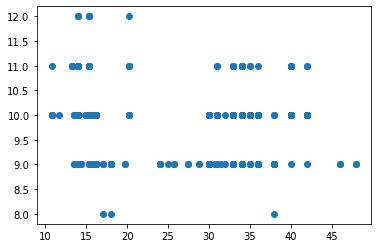

In [10]:
# Plot the price per bushel by month as a scatter plot using matplotlib
price_per_bushel = new_pumpkins.Price_per_bushel
month = new_pumpkins.Month
plt.scatter(price_per_bushel, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price per Bushel')

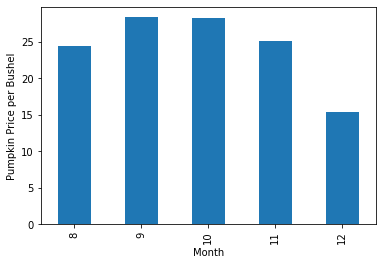

In [11]:
# Create a barchart of the mean price per bushel by month
new_pumpkins.groupby('Month')['Price_per_bushel'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price per Bushel')

In [12]:
# Find and print the correlation between (a) Month and Price_per_bushel and (b) Day and Price_per_bushel
print(new_pumpkins.Month.corr(new_pumpkins.Price_per_bushel))
print(new_pumpkins.Day.corr(new_pumpkins.Price_per_bushel))

-0.15301753342343621
-0.18091690190515358


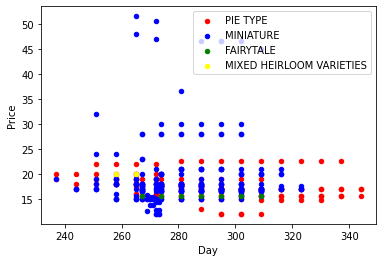

In [13]:
# Create a new scatterplot of the price per bushel by day of the year with each variety as a different color
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('Day','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

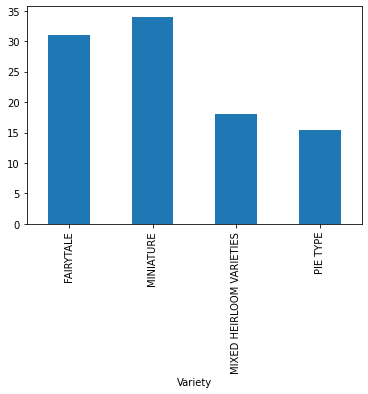

In [14]:
# Create a bar grah to show mean price per bushel by variety
new_pumpkins.groupby('Variety')['Price_per_bushel'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Day', ylabel='Price_per_bushel'>

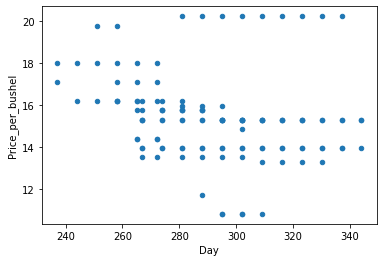

In [15]:
# Create a scatterplot of the price per bushel by day of the year for the pie type variety
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('Day','Price_per_bushel')

In [16]:
# Find and print the correlation between Day and Price_per_bushel
print(pie_pumpkins.Day.corr(pie_pumpkins.Price_per_bushel))

-0.21432671841767875


In [17]:
# Get rid of all empty cells in pie_pumpkins
pie_pumpkins = pie_pumpkins.dropna()
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 70 to 1630
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             125 non-null    int64  
 1   Day               125 non-null    int64  
 2   Package           125 non-null    object 
 3   Variety           125 non-null    object 
 4   City Name         125 non-null    object 
 5   Low Price         125 non-null    float64
 6   High Price        125 non-null    float64
 7   Price             125 non-null    float64
 8   Price_per_bushel  125 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 9.8+ KB


In [18]:
# Import necessary libraries for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [19]:
# Create numpy arrays for the features (Day) and the labels (Price_per_bushel)
X = pie_pumpkins.Day.values.reshape(-1,1)
y = pie_pumpkins.Price_per_bushel.values

In [20]:
# Split the data into training and testing sets with a fixed random state and test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [21]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Use the model to predict the labels of the test data
y_pred = model.predict(X_test)

# Print the mean squared error of the model on the test data
print(mean_squared_error(y_test, y_pred))

mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

3.6167765348164833
Mean error: 1.9 (12.3%)


In [23]:
# Find and print the model's coefficient of determination (R^2) on the training data
print(model.score(X_train, y_train))

0.05275859729809851


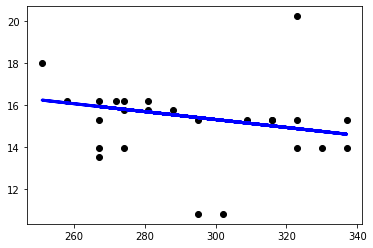

In [24]:
# Plot the test data as a scatter plot with the regression line overlaid
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

In [25]:
# Import libraries for polynomial regression and pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline for polynomial regression
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [26]:
# One-hot encode the variety column and add it to the dataframe
pd.get_dummies(new_pumpkins, columns=['Variety'])


,Month,Day,Package,City Name,Low Price,High Price,Price,Price_per_bushel,Variety_FAIRYTALE,Variety_MINIATURE,Variety_MIXED HEIRLOOM VARIETIES,Variety_PIE TYPE
70,9,267,1 1/9 bushel cartons,BALTIMORE,15.00,15.0,15.000,13.50,0,0,0,1
71,9,267,1 1/9 bushel cartons,BALTIMORE,18.00,18.0,18.000,16.20,0,0,0,1
72,10,274,1 1/9 bushel cartons,BALTIMORE,18.00,18.0,18.000,16.20,0,0,0,1
73,10,274,1 1/9 bushel cartons,BALTIMORE,17.00,17.0,17.000,15.30,0,0,0,1
74,10,281,1 1/9 bushel cartons,BALTIMORE,15.00,15.0,15.000,13.50,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1738,9,273,1/2 bushel cartons,ST. LOUIS,15.00,15.0,15.000,30.00,0,1,0,0
1739,9,273,1/2 bushel cartons,ST. LOUIS,13.75,15.0,14.375,28.75,0,1,0,0
1740,9,273,1/2 bushel cartons,ST. LOUIS,10.75,15.0,12.875,25.75,0,1,0,0
1741,9,273,1/2 bushel cartons,ST. LOUIS,12.00,12.0,12.000,24.00,0,1,0,0


In [27]:
# Get rid of empty cells in the dataframe
new_pumpkins = new_pumpkins.dropna()

# Initialize X and y to predict price per bushel from the variety columns
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price_per_bushel']

In [28]:
# Find the mean squared error and coefficient of determination for the polynomial regression model with the new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(model.score(X_test, y_test))

20.9057901805156
0.7746663953906844


In [30]:
# Create a pipeline for polynomial regression
degree = 2
new_model = LinearRegression()

X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City Name'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# Find the mean squared error and coefficient of determination for the polynomial regression model with the new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
new_model.fit(X_train, y_train)
y_pred = new_model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(new_model.score(X_test, y_test))

1.9859350565317515
0.5681864893917972


In [31]:
# set up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City Name'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.18e+10 (-8.6e+02%)
Model determination:  0.6476183090455624
